In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Dropout

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install rasterio

import rasterio as rio

     |████████████████████████████████| 19.3 MB 83.4 MB/s 


# load Model

In [3]:
import keras
model_file = '/content/drive/My Drive/Colab Notebooks/PostDoc/PostDoc_Model01.h5'
model = keras.models.load_model(model_file)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 5) 0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 224, 224, 32) 1472        input_2[0][0]                    
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 224, 224, 32) 0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 224, 224, 32) 9248        dropout_8[0][0]                  
____________________________________________________________________________________________

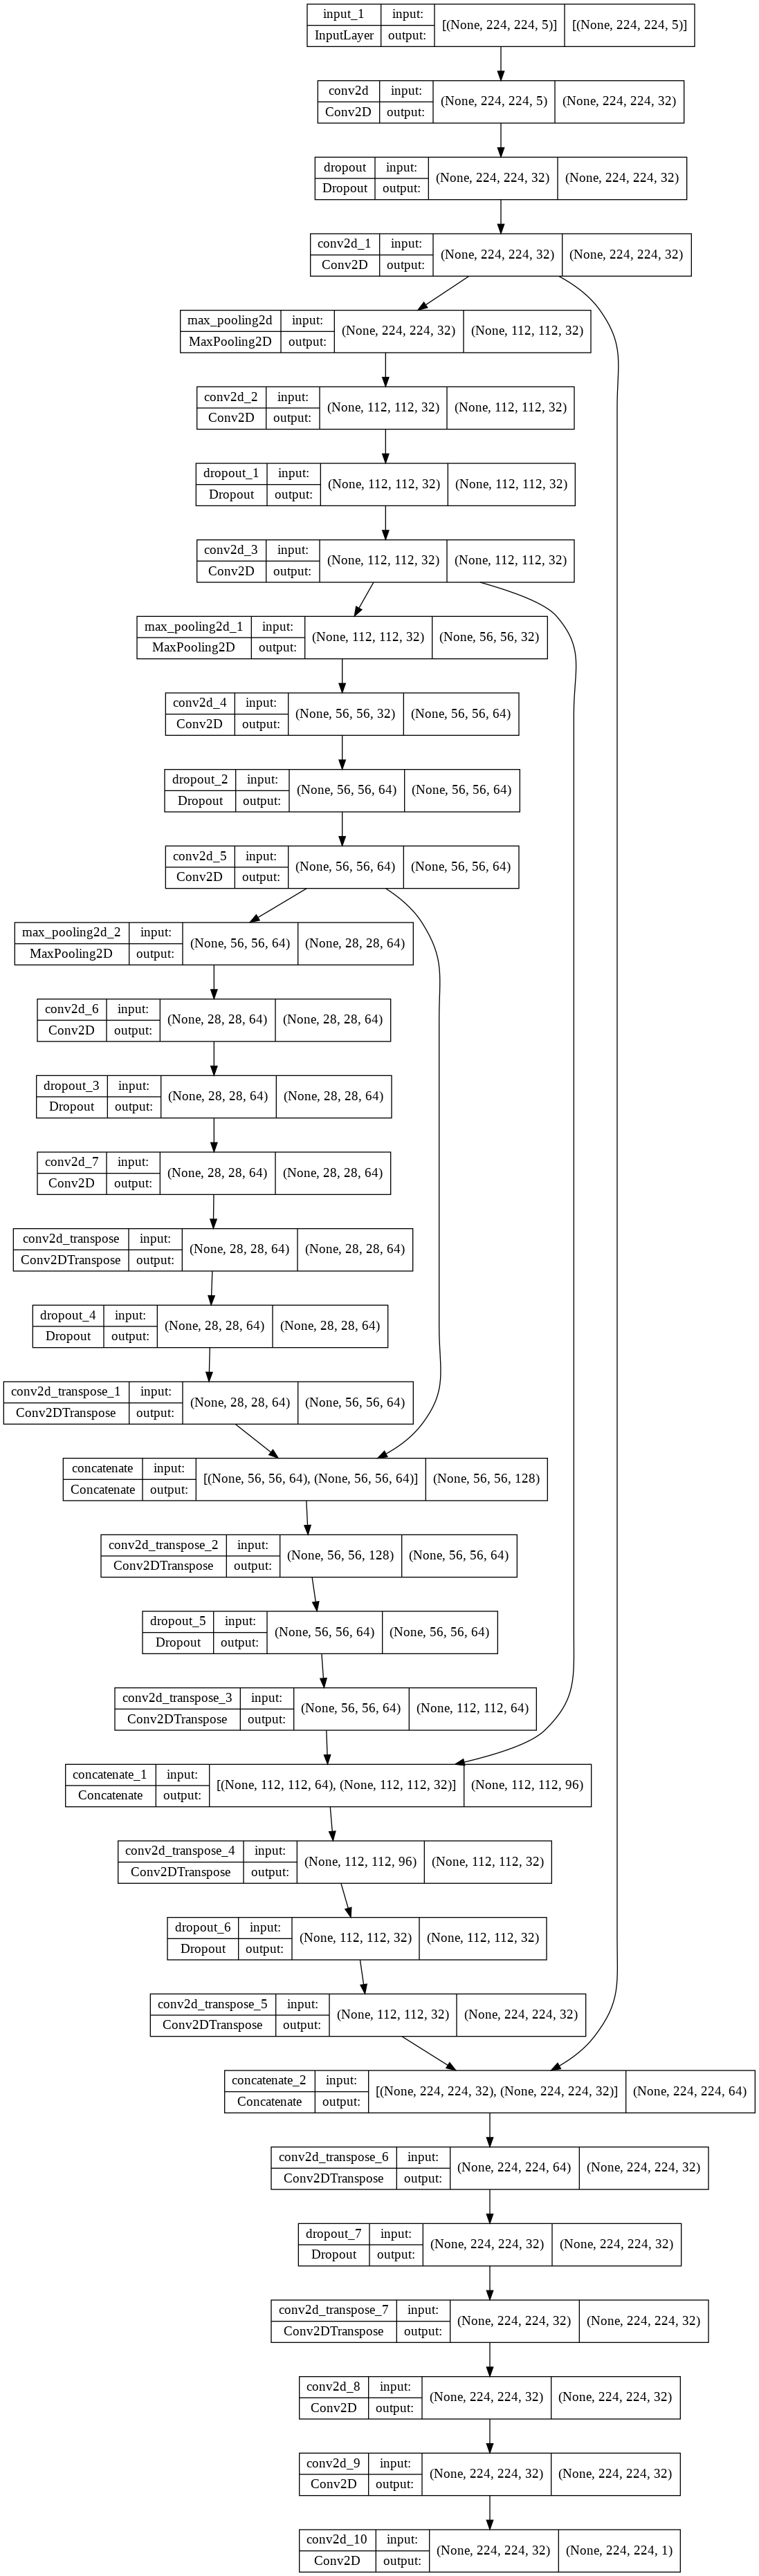

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# Load data

In [5]:
import glob
images = glob.glob('/content/drive/My Drive/BabolHeight2018' + '/*.tif')

In [6]:
import os
for filename in images:
    if filename.endswith("tif"):
      img_multi = rio.open(filename)
      img_array = img_multi.read()
      imtransform = img_multi.transform
      nRows =  img_array.shape[1]
      nCols =  img_array.shape[2]
      Bands = img_array.shape[0]
      img_array_reshape = img_array.reshape(Bands, nRows*nCols).T
      img_array_reshape = img_array_reshape.reshape(nRows,nCols,Bands)
      img_array_reshape = img_array_reshape[:,:,:5].reshape(1,nRows,nCols,Bands)
      pred_test = model.predict(img_array_reshape)
      pred_test = pred_test.reshape( nRows, nCols)
      with rio.open(
        '/content/drive/My Drive/BabolHeight2018_2/' + filename.split('/')[5],
        'w',
        driver='GTiff',
        height=nCols,
        width=nRows,
        count=1,
        dtype=pred_test.dtype,
        crs='+proj=latlong',
        transform=imtransform,
      ) as dst:
        dst.write(pred_test, 1)